In [339]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import warnings
from urllib3.exceptions import InsecureRequestWarning

# Suppress warnings
warnings.simplefilter("ignore", InsecureRequestWarning)
warnings.simplefilter("ignore", FutureWarning)

In [340]:
# List of URLs
urls = [
    "https://statistics.kilimo.go.ke/en/KenyafarmingHH/",
    "https://statistics.kilimo.go.ke/en/2_2/",
    "https://statistics.kilimo.go.ke/en/1_3/",
    "https://statistics.kilimo.go.ke/en/2_3a/",
    "https://statistics.kilimo.go.ke/en/2_3c/",
    "https://statistics.kilimo.go.ke/en/1_7/"
]

# Dictionary to store DataFrames
dfs = {}

# Loop through each URL and store the DataFrames
for i, url in enumerate(urls, start=1):
    # Request the webpage content, ignoring SSL verification
    response = requests.get(url, verify=False)
    
    # Parse the HTML
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the table
    table = soup.find('table')
    
    # Convert the table to a pandas DataFrame
    df = pd.read_html(str(table))[0]
    
    # Store the DataFrame in the dictionary
    dfs[f'df_{i}'] = df

# Drop the first row (row 0) from all DataFrames in the dfs dictionary
for key in dfs:
    dfs[key] = dfs[key].drop(0).reset_index(drop=True)

#### Exploratory Data Analysis and Cleaning Up data

In [341]:
# Rename the DataFrames
rename_map = {
    'df_1': 'kenya_farming_households',
    'df_2': 'agricultural_subsector',
    'df_3': 'agriculture_main_purpose',
    'df_4': 'agriculture_crop_main_purpos',
    'df_5': 'livestock_Farming',
    'df_6': 'agriculture_size'
}

In [342]:
# Create new variables in the global scope for each renamed DataFrame
for old_name, new_name in rename_map.items():
    globals()[new_name] = dfs[old_name]

for key in dfs:
    # Replace '-' with 'county' and change 'County' to 'county'
    dfs[key].columns = (
        dfs[key].columns.str.replace('-', 'county', regex=False)
                         .str.replace('County', 'county', regex=False)
    )

In [369]:
agriculture_crop_main_purpos

,county,Farming Households,Crop Farming Households,Subsistence Crop Farming,Commercial Crop Production,DK,Total Production,Crop Farming Ratio
0,Mombasa,13171,7207,6239,954,14,7193,0.547187
1,Kwale,109040,100010,90652,9278,80,99930,0.917186
2,Kilifi,162648,149324,139438,9802,84,149240,0.918081
3,Tana River,34989,16716,12207,4494,15,16701,0.477750
4,Lamu,20254,15195,10561,4624,10,15185,0.750222
5,Taita-Taveta,56881,48379,41524,6845,10,48369,0.850530
6,Garissa,46109,4372,2357,1882,133,4239,0.094819
7,Wajir,61959,2461,2007,373,81,2380,0.039720
8,Mandera,61583,15258,12682,2372,204,15054,0.247763
9,Marsabit,38811,2644,2360,274,10,2634,0.068125


##### Which County has the highest % of farming Household

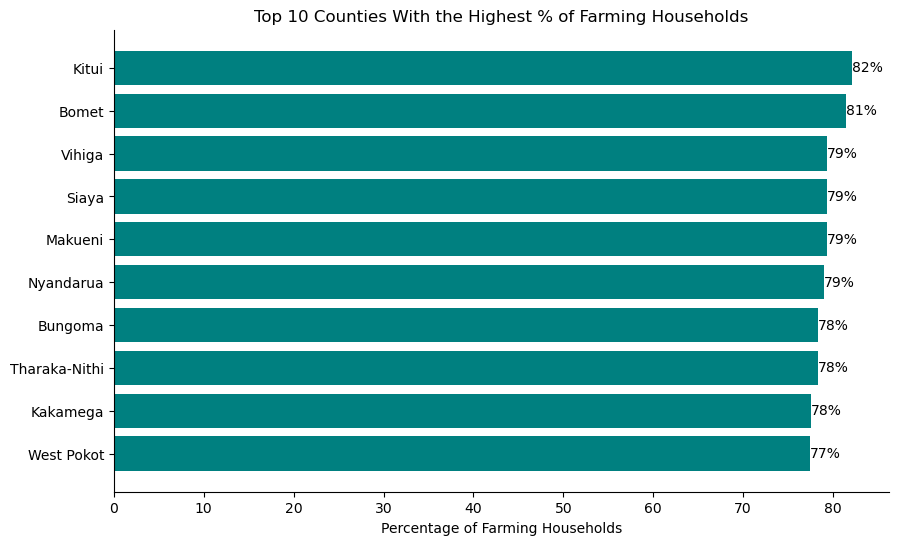

In [344]:
# Sorting the DataFrame by '% of farming Households' and selecting top 10
kenya_farming_households_sorted = kenya_farming_households.sort_values(by='% of farming Households', ascending=False).head(10)

# Plotting the filtered top 10 counties
plt.figure(figsize=(10, 6))
bars = plt.barh(kenya_farming_households_sorted['county'], kenya_farming_households_sorted['% of farming Households'], color='teal')

# Adding labels to the bars
for bar in bars:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():.0f}%',  # Formating the percentage to no decimal
        va='center'  # Center the text vertically
    )

plt.xlabel('Percentage of Farming Households')
plt.title('Top 10 Counties With the Highest % of Farming Households')
plt.gca().invert_yaxis()  # Display the largest bar at the top rather than at the bottom
# Removing the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [345]:
# Calculate Total Production
agriculture_crop_main_purpos['Total Production'] = agriculture_crop_main_purpos['Subsistence Crop Farming'] + agriculture_crop_main_purpos['Commercial Crop Production']

# Calculate averages
average_subsistence = agriculture_crop_main_purpos['Subsistence Crop Farming'].mean()
average_commercial = agriculture_crop_main_purpos['Commercial Crop Production'].mean()

# Find best performing crop type
total_subsistence = agriculture_crop_main_purpos['Subsistence Crop Farming'].sum()
total_commercial = agriculture_crop_main_purpos['Commercial Crop Production'].sum()

best_crop_type = "Subsistence Crop Farming" if total_subsistence > total_commercial else "Commercial Crop Production"

print(f"Average Subsistence Crop Farming: {average_subsistence}")
print(f"Average Commercial Crop Production: {average_commercial}")
print(f"Best performing crop type: {best_crop_type}")

Average Subsistence Crop Farming: 87728.74468085106
Average Commercial Crop Production: 30388.872340425532
Best performing crop type: Subsistence Crop Farming


In [346]:
# Calculate the ratio: Crop Farming Households / Farming Households
agriculture_crop_main_purpos['Crop Farming Ratio'] = agriculture_crop_main_purpos['Crop Farming Households'] / agriculture_crop_main_purpos['Farming Households']

# Sort by the ratio in descending order and select top 10 counties
top_10_counties = agriculture_crop_main_purpos[['county', 'Crop Farming Ratio']].sort_values(by='Crop Farming Ratio', ascending=False).head(10)


In [347]:
merged_data = agriculture_main_purpose.merge(kenya_farming_households, on='county', suffixes=('', '_households'))\
    .merge(agricultural_subsector, on='county', suffixes=('', '_subsector'))\
    .merge(agriculture_crop_main_purpos, on='county', suffixes=('', '_crop'))\
    .merge(livestock_Farming, on='county', suffixes=('', '_livestock'))\
    .merge(agriculture_size, on='county', suffixes=('', '_size'))

In [348]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 38 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   county                                  47 non-null     object 
 1   Farming Households                      47 non-null     int64  
 2   Subsistence Farming                     47 non-null     int64  
 3   Commercial Production                   47 non-null     int64  
 4   DK                                      47 non-null     int64  
 5   Total                                   47 non-null     int64  
 6   Farming Households_households           47 non-null     int64  
 7   Non Farming Households                  47 non-null     int64  
 8   % of farming Households                 47 non-null     float64
 9   Farming Households_subsector            47 non-null     int64  
 10  Crop Farming Households                 47 non-null     int64  


In [349]:
# List of columns to drop
columns_to_drop = [
    'DK Farming Households', 
    'Non Farming Households', 
    'Farming Households_subsector', 
    'Farming Households_crop', 
    'DK_crop',  
    'DK_livestock', 
    'Total_size', 
    'Not Stated',  
    '1000+ Acre',  
    '100county499 Acres', 
    '500 – 999 Acre', 
    'Livestock Farming Households_livestock', 
    'Farming Households_households',
    'Farming Households_livestock',
    'Crop Farming Households_crop',
    'DK',
    'Total',
    'Crop Farming Ratio',
]

# Dropping the specified columns
merged_data = merged_data.drop(columns=columns_to_drop, errors='ignore')

In [350]:
pd.set_option('display.max_columns', None)
merged_data.head()

,county,Farming Households,Subsistence Farming,Commercial Production,% of farming Households,Crop Farming Households,Livestock Farming Households,Aquaculture Households,Fishing Households,Subsistence Crop Farming,Commercial Crop Production,Total Production,Subsistence Livestock Farming,Commercial Livestock Production,Less than 1 Acre,1 – 1.99 Acre,2 – 4.99 Acre,5 – 9.99 Acre,10 – 19.99 Acre,20 – 49.99 Acre,50 – 99 Acre
0,Mombasa,13171,9891,2176,3.5,7207,8225,93,1409,6239,954,7193,6465,1704,6068,2280,2877,561,236,86,50
1,Kwale,109040,97816,9788,63.1,100010,70211,212,4452,90652,9278,99930,63266,6798,10346,18299,46609,19716,8767,3329,722
2,Kilifi,162648,149648,10890,54.6,149324,97900,360,6393,139438,9802,149240,89873,7902,20384,46821,74081,13464,4335,1344,297
3,Tana River,34989,29089,5153,52.3,16716,26182,207,2136,12207,4494,16701,23152,2746,9218,6259,12821,3619,1714,572,323
4,Lamu,20254,13614,4947,59.2,15195,13144,63,3162,10561,4624,15185,9744,3356,2887,2870,6573,3655,2128,472,26


In [351]:
### Getting Rainfall data 
county_data = pd.read_excel('county_data.xlsx')
county_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   County                        47 non-null     object
 1   Average Yearly Rainfall (mm)  47 non-null     object
 2   Average Temperature (°C)      47 non-null     int64 
 3   Farm Size (ha)                47 non-null     int64 
 4   Dominant Crop                 47 non-null     object
 5   Other Crops                   47 non-null     object
 6   Location                      47 non-null     object
 7   Farming Practices             47 non-null     object
dtypes: int64(2), object(6)
memory usage: 3.1+ KB


In [352]:
county_data['Average Yearly Rainfall (mm)'] 

0       850
1     1,350
2     1,500
3     1,500
4     1,250
5     1,350
6       250
7     1,500
8       300
9       650
10    1,900
11    2,000
12    1,250
13    1,000
14    1,350
15    1,750
16    1,500
17      650
18    1,000
19      650
20    1,000
21      650
22      650
23      250
24      300
25    1,350
26    1,500
27    1,100
28    1,350
29      900
30    1,075
31    1,500
32    1,250
33    1,750
34    1,350
35    1,350
36      300
37    1,500
38      650
39      300
40    1,250
41    1,500
42      250
43    1,500
44    1,750
45      250
46      650
Name: Average Yearly Rainfall (mm), dtype: object

In [353]:
# Convert necessary columns to numeric
# Remove commas from the 'Average Yearly Rainfall (mm)' column
county_data['Average Yearly Rainfall (mm)'] = county_data['Average Yearly Rainfall (mm)'].str.replace(',', '')

# Now convert the cleaned column to numeric
county_data['Average Yearly Rainfall (mm)'] = pd.to_numeric(county_data['Average Yearly Rainfall (mm)'], errors='coerce')

In [354]:
def categorize_risks(row):
    # Climate Risk
    if row['Average Yearly Rainfall (mm)'] < 750 or row['Average Temperature (°C)'] > 28:
        climate_risk = 'High'
    elif row['Average Yearly Rainfall (mm)'] < 1000 or row['Average Temperature (°C)'] > 24:
        climate_risk = 'Moderate'
    else:
        climate_risk = 'Low'

    # Financial Risk
    high_risk_crops = ['Livestock', 'Fishing']
    if row['Farm Size (ha)'] < 2 or any(crop in row['Dominant Crop'] for crop in high_risk_crops):
        financial_risk = 'High'
    elif row['Farm Size (ha)'] < 3 or any(crop in row['Other Crops'] for crop in high_risk_crops):
        financial_risk = 'Moderate'
    else:
        financial_risk = 'Low'

    # Market Risk
    market_dependent_crops = ['Dairy', 'Fishing']  # crops with market challenges
    if any(crop in row['Dominant Crop'] for crop in market_dependent_crops):
        market_risk = 'High'
    elif any(crop in row['Other Crops'] for crop in market_dependent_crops):
        market_risk = 'Moderate'
    else:
        market_risk = 'Low'

    return pd.Series([climate_risk, financial_risk, market_risk], index=['Climate Risk', 'Financial Risk', 'Market Risk'])

# Apply the function to your dataframe
county_data[['Climate Risk', 'Financial Risk', 'Market Risk']] = county_data.apply(categorize_risks, axis=1)


In [355]:
 # Function to determine overall risk level based on individual risks
def determine_overall_risk(row):
    if 'High' in [row['Climate Risk'], row['Financial Risk'], row['Market Risk']]:
        return 'High'
    elif 'Moderate' in [row['Climate Risk'], row['Financial Risk'], row['Market Risk']]:
        return 'Moderate'
    else:
        return 'Low'

# Apply the function to determine overall risk level
county_data['Risk Level'] = county_data.apply(determine_overall_risk, axis=1)


In [356]:
county_data.head()

,County,Average Yearly Rainfall (mm),Average Temperature (°C),Farm Size (ha),Dominant Crop,Other Crops,Location,Farming Practices,Climate Risk,Financial Risk,Market Risk,Risk Level
0,Baringo,850,24,3,Maize,"beans, livestock",Rift Valley,"Mixed farming, agro-pastoralism",Moderate,Low,Low,Moderate
1,Bomet,1350,20,2,Tea,"dairy, maize",Rift Valley,"Small-scale farming, tea plantations",Low,Moderate,Low,Moderate
2,Bungoma,1500,23,2,Sugarcane,"maize, dairy",Western,"Crop rotation, intercropping",Low,Moderate,Low,Moderate
3,Busia,1500,25,2,Maize,"cassava, fishing",Western,"Subsistence farming, fishing",Moderate,Moderate,Low,Moderate
4,Elgeyo-Marakwet,1250,20,3,Dairy,"maize, potatoes",Rift Valley,"Mixed farming, terracing",Low,Low,High,High


In [357]:
county_data.rename(columns={'County': 'county'}, inplace=True)

In [358]:
merged_data['county'] = merged_data['county'].replace({"Murang'a": "Muranga", "Nairobi City": "Nairobi", "Kakamega" : "Kakamega"})
county_data['county'] = merged_data['county'].replace({"Murang’a": "Muranga", "Murang’a": "Homabay", "Kakamega": "Kakamega"})

In [359]:
merged_data[merged_data['county']== 'Kakamega']

,county,Farming Households,Subsistence Farming,Commercial Production,% of farming Households,Crop Farming Households,Livestock Farming Households,Aquaculture Households,Fishing Households,Subsistence Crop Farming,Commercial Crop Production,Total Production,Subsistence Livestock Farming,Commercial Livestock Production,Less than 1 Acre,1 – 1.99 Acre,2 – 4.99 Acre,5 – 9.99 Acre,10 – 19.99 Acre,20 – 49.99 Acre,50 – 99 Acre
36,Kakamega,334835,303561,30957,77.5,321923,228477,2178,3184,291261,30519,321780,204614,23742,154183,88622,74426,13040,3298,903,259


In [360]:
unique_values_county = set(county_data['county'].unique())
unique_values_merged = set(merged_data['county'].unique())

# Find values present in df1 but not in df2
missing_in_df2 = unique_values_county - unique_values_merged 

# Find values present in df2 but not in df1
missing_in_df1 = unique_values_merged  - unique_values_county

# Print the results
print("Unique values in df1 but missing in df2:", missing_in_df2)
print("Unique values in df2 but missing in df1:", missing_in_df1)

Unique values in df1 but missing in df2: set()
Unique values in df2 but missing in df1: set()


In [361]:
# Merging the datasets on the 'County' column
final_data = pd.merge(merged_data, county_data, on='county', how='left', suffixes=('_merged', '_county'))

In [362]:
final_data_kakamega = final_data[final_data['county'] == 'Kakamega']

In [363]:
final_data_kakamega

,county,Farming Households,Subsistence Farming,Commercial Production,% of farming Households,Crop Farming Households,Livestock Farming Households,Aquaculture Households,Fishing Households,Subsistence Crop Farming,Commercial Crop Production,Total Production,Subsistence Livestock Farming,Commercial Livestock Production,Less than 1 Acre,1 – 1.99 Acre,2 – 4.99 Acre,5 – 9.99 Acre,10 – 19.99 Acre,20 – 49.99 Acre,50 – 99 Acre,Average Yearly Rainfall (mm),Average Temperature (°C),Farm Size (ha),Dominant Crop,Other Crops,Location,Farming Practices,Climate Risk,Financial Risk,Market Risk,Risk Level
36,Kakamega,334835,303561,30957,77.5,321923,228477,2178,3184,291261,30519,321780,204614,23742,154183,88622,74426,13040,3298,903,259,300,31,7,Livestock,horticulture,Rift Valley,"Pastoralism, irrigation",High,High,Low,High


#### What is the % of crop farming in general

### Crop Farming Percentage Formula

$$ 
\text{Crop Farming \%} = \left( \frac{\text{Crop Farming Households}}{\text{Farming Households}} \right) \times 100
$$ 

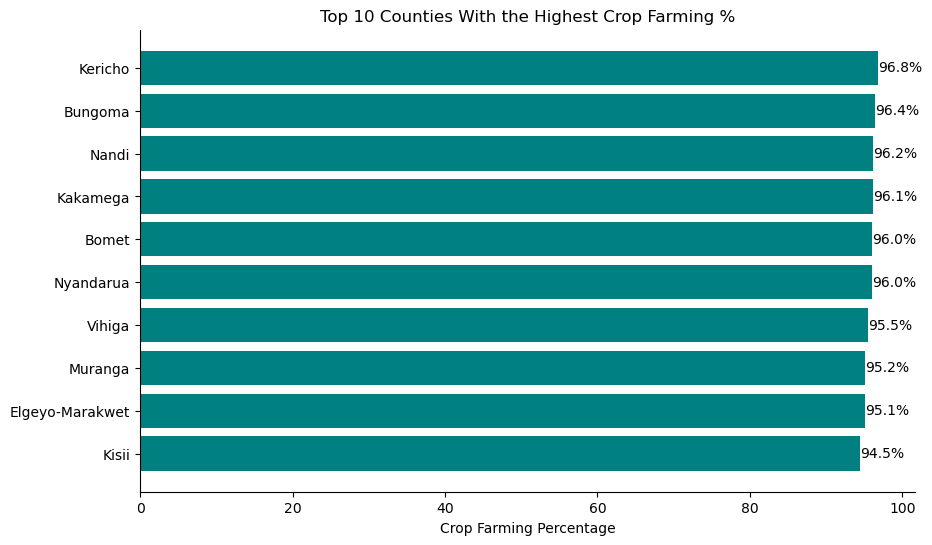

In [364]:
# Calculate Crop Farming Percentage
final_data['Crop Farming %'] = (final_data['Crop Farming Households'] / final_data['Farming Households']) * 100

# Sort the DataFrame by 'Crop Farming %' and selecting top 10
county_data_sorted = final_data.sort_values(by='Crop Farming %', ascending=False).head(10)

# Plotting the filtered top 10 counties
plt.figure(figsize=(10, 6))
bars = plt.barh(county_data_sorted['county'], county_data_sorted['Crop Farming %'], color='teal')

# Adding labels to the bars
for bar in bars:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():.1f}%',  # Format the percentage to one decimal place
        va='center'  # Center the text vertically
    )

plt.xlabel('Crop Farming Percentage')
plt.title('Top 10 Counties With the Highest Crop Farming %')
plt.gca().invert_yaxis()  # Display the largest bar at the top

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

### Which County has the highest % of farming Household

In [365]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   county                           47 non-null     object 
 1   Farming Households               47 non-null     int64  
 2   Subsistence Farming              47 non-null     int64  
 3   Commercial Production            47 non-null     int64  
 4   % of farming Households          47 non-null     float64
 5   Crop Farming Households          47 non-null     int64  
 6   Livestock Farming Households     47 non-null     int64  
 7   Aquaculture Households           47 non-null     object 
 8   Fishing Households               47 non-null     object 
 9   Subsistence Crop Farming         47 non-null     int64  
 10  Commercial Crop Production       47 non-null     int64  
 11  Total Production                 47 non-null     int64  
 12  Subsistence Livestock Fa

In [366]:
final_data.to_csv('merged_data.csv', index=False)